In [1]:
import tensorflow as tf          # TensorFlow
from tensorflow import keras      # Keras API inside TensorFlow
import numpy as np                # NumPy for numerical operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

(-0.5, 27.5, 27.5, -0.5)

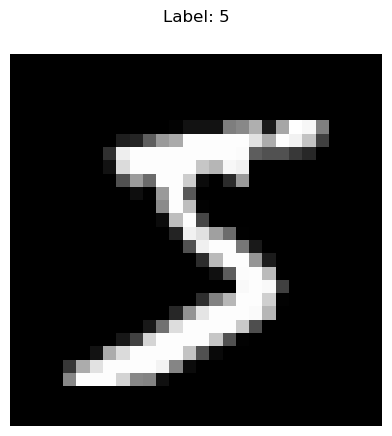

In [4]:
plt.matshow(X_train[0], cmap='gray')
plt.show
plt.title(f"Label: {y_train[0]}")    # Show the corresponding label
plt.axis('off') 

In [5]:
len(X_test)

10000

In [6]:
# Normalize pixel values (scaling to range 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(1208,activation='relu', input_shape=(784,)),
    keras.layers.Dense(508,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattend, y_train, epochs=5)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9450 - loss: 0.1801
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9755 - loss: 0.0776
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9822 - loss: 0.0560
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9869 - loss: 0.0416
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9887 - loss: 0.0353


In [36]:
evaluation = model.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9808 - loss: 0.0774


In [10]:
prediction = model.predict(X_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
np.argmax(prediction[0])

7

In [12]:
prediction2 = [np.argmax(i) for i in prediction]

In [13]:
prediction2[:7]

[7, 2, 1, 0, 4, 1, 4]

In [14]:
y_test[:33]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3], dtype=uint8)

In [15]:
cm = tf.math.confusion_matrix(y_test, prediction2)

In [16]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    1,    0,    1,    0,    1,    1,    0],
       [   0, 1128,    1,    1,    0,    0,    1,    0,    4,    0],
       [   2,    0, 1020,    3,    1,    0,    0,    2,    4,    0],
       [   0,    0,    4,  993,    0,    3,    0,    6,    0,    4],
       [   0,    0,    3,    0,  964,    0,    0,    3,    1,   11],
       [   2,    0,    0,   10,    1,  862,    2,    0,   11,    4],
       [   3,    5,    2,    1,    5,    5,  933,    0,    4,    0],
       [   0,    4,    5,    0,    1,    0,    0, 1007,    4,    7],
       [   1,    0,    4,    9,    2,    0,    0,    3,  946,    9],
       [   1,    4,    1,    6,    9,    2,    1,    4,    0,  981]])>

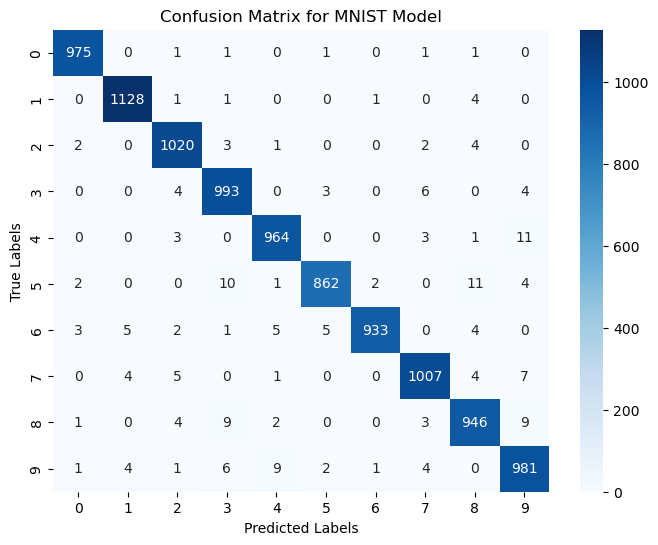

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MNIST Model')
plt.show()

## More models with different layers, loss function, epochs.

In [77]:
models = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(508,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

models.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
models.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9407 - loss: 0.1997
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9762 - loss: 0.0804
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9832 - loss: 0.0531
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9880 - loss: 0.0368
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9912 - loss: 0.0273


In [85]:
models.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0671


[0.06707043945789337, 0.9803000092506409]

In [80]:
#optimizer == SGD(Stochastic Gradient Descent)
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(508,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model2.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8543 - loss: 0.6014
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9111 - loss: 0.3214
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9240 - loss: 0.2734
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9328 - loss: 0.2434
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9390 - loss: 0.2202


In [87]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9429 - loss: 0.2071


[0.20705954730510712, 0.9429000020027161]

In [89]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(508,activation='relu'),
    keras.layers.Dense(108,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model3.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9427 - loss: 0.1893
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9750 - loss: 0.0790
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9827 - loss: 0.0549
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9865 - loss: 0.0419
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9902 - loss: 0.0304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9909 - loss: 0.0280
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9927 - loss: 0.0217
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9933 - loss: 0.0197
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9946 - loss: 0.0168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9950 - loss: 0.0156


In [91]:
models.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0776


[0.0776272863149643, 0.9818999767303467]

In [98]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(108,activation='sigmoid'),
    keras.layers.Dense(10,activation='relu')
    
])

model4.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model4.fit(X_train, y_train, epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1215 - loss: 2.4179
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1048 - loss: 2.2889
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1014 - loss: 2.2964
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1021 - loss: 2.2955
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0987 - loss: 2.3025
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.3025
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.3025


In [94]:
model4.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0980 - loss: 2.3026


[2.30259108543396, 0.09799999743700027]